In [19]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt

In [20]:
h = fits.open(r"C:\Users\jacks\Downloads\hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
data = h[0].data.astype(np.float64)


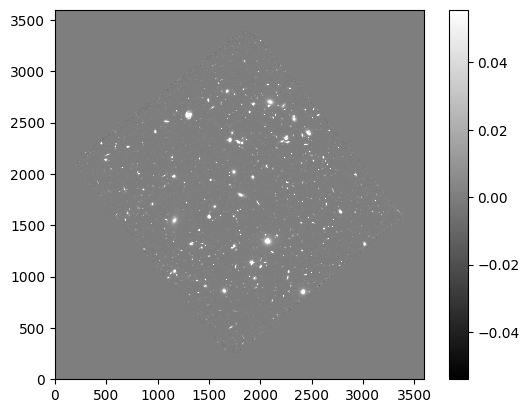

In [21]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

plt.savefig("2fig1.png", dpi=150)
plt.show()

In [22]:
bkg = sep.Background(data)

In [23]:
bkg_image = bkg.back()

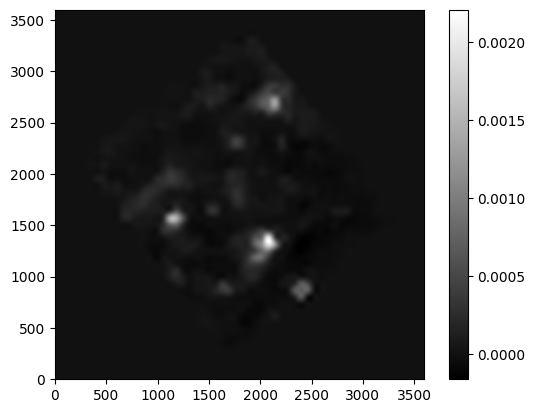

In [24]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

plt.savefig("2fig2.png", dpi=150)
plt.show()

In [25]:
bkg_rms = bkg.rms()

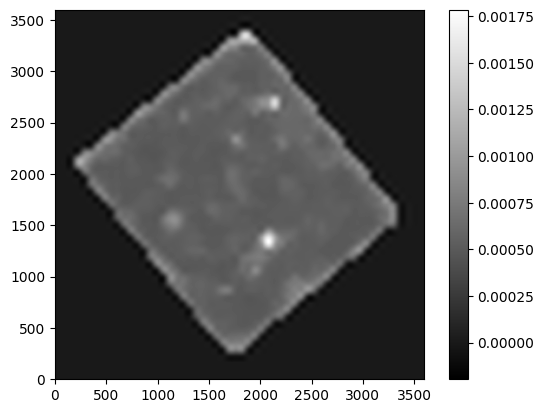

In [26]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

plt.savefig("2fig3.png", dpi=150)
plt.show()

In [27]:
data_sub = data - bkg

In [28]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
print("Number of objects found:", len(objects))

Number of objects found: 8630


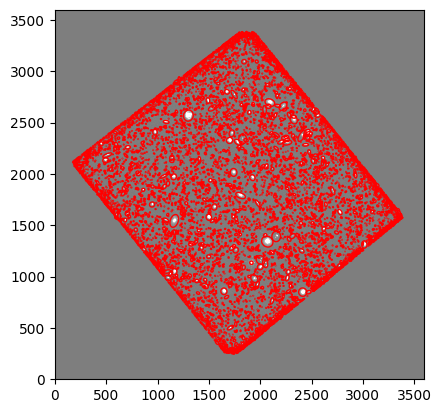

In [29]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig("2fig4.png", dpi=150)
plt.show()

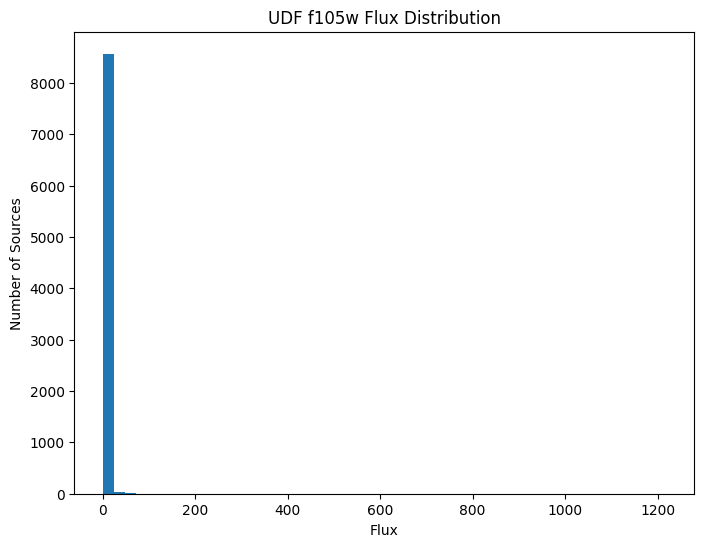

In [30]:
fluxes = objects['flux']

plt.figure(figsize=(8,6))
plt.hist(fluxes, bins=50)
plt.xlabel("Flux")
plt.ylabel("Number of Sources")
plt.title("UDF f105w Flux Distribution")
plt.savefig("udf_f105w_flux_hist.png", dpi=150)
plt.show()


In [39]:
mean = np.mean(fluxes)
median = np.median(fluxes)
std = np.std(fluxes)

print("Mean flux:", mean_flux)
print("Median flux:", median_flux)
print("Std dev:", std_flux)


Mean flux: 1.174022567885316
Median flux: 0.03489665500819683
Std dev: 17.55884943545668


In [32]:
max_flux = np.max(fluxes)
max_index = np.argmax(fluxes)
max_obj = objects[max_index]

sigma_offset = (max_flux - mean_flux) / std_flux

print("Largest flux:", max_flux)
print("Coordinates (x, y):", max_obj['x'], max_obj['y'])
print("Number of sigma from mean:", sigma_offset)


Largest flux: 1218.4195556640625
Coordinates (x, y): 1914.2549094883857 1134.3164850742164
Number of sigma from mean: 69.3237639271618


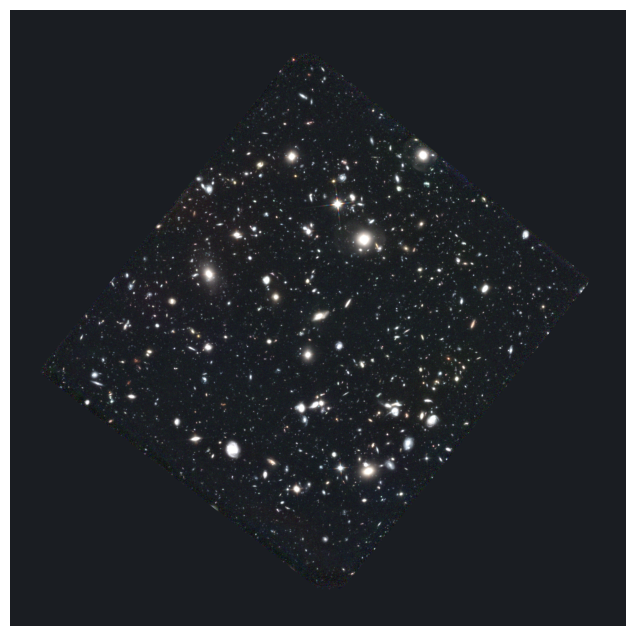

In [38]:
f105 = fits.getdata(r"C:\Users\jacks\Downloads\hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
f125 = fits.getdata(r"C:\Users\jacks\Downloads\hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
f160 = fits.getdata(r"C:\Users\jacks\Downloads\hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")

R = norm(f160)
G = norm(f125)
B = norm(f105)

rgb = np.dstack([R, G, B])

plt.figure(figsize=(8,8))
plt.imshow(rgb)
plt.axis("off")
plt.savefig("udf_rgb_f160_f125_f105.png", dpi=200)
plt.show()